<img src="../../images/Callysto_Notebook-Banner_Top_06.06.18.jpg"/>

# Shakespeare and Statistics

![shakespeare](images/shakespeare-n-stats.png)

Can art and science be combined? Natural language processing allows us to use the same statistical skills you might learn in a science class, such as counting up members of a population and looking at their distribution, to gain insight into the written word. Here's a really simple example of what you can do. Let's consider the following question:

## What are the top 20 phrases in Shakespeare's Macbeth?

Normally, when we study Shakespeare, we critically read his plays and study the plot, characters, and themes. While this is definitely interesting stuff, we can gain very different insights by taking a multidisciplinary approach.

This is something we would probably never do if we had to do it by hand. Imagine getting out your clipboard, writing down every different word or phrase you come across and then counting how many times that same word or phrase reappears. Check out how quickly it can be done using Callysto and the free, open tools it brings with it...

## Getting started

First, we have to load a few things... This handles a lot of setup behind the scenes so that you don't have to have it in the notebook distracting students from what you really want to show. It also brings in a number helpers that we've made to avoid some of the technical details of grabbing text from a website and processing it. You could choose to include these details in this notebook or look at the files we're loading if you got really curious, but you don't have to.

Simply run this block to continue.

In [1]:
from notebook_code.shakespeare import *

[nltk_data] Downloading package brown to /home/jupyter/nltk_data...
[nltk_data]   Package brown is already up-to-date!


## Finding the text

The helper we're using to get the right file from the [gutenberg.org](http://www.gutenberg.org) website needs a number. This is the same number that the folks at Gutenberg use to organize all the works available on the site. Let's track that down, starting with a google search.
<br/>
<br/>
<br/>
![google-search](images/google-search.png)

![google-results](images/google-results.png)
<br/>
<br/>
<br/>
We may see more than one result, as there may be multiple versions of popular works. Just make sure to click a link that's from [gutenberg.org](http://www.gutenberg.org) and you should end up seeing a page like this:
<br/>
<br/>
<br/>
![gutenberg-download](images/gutenberg-download.png)
<br/>
<br/>
<br/>
Next, click that **Bibrec** tab, and you'll see a page like this:
<br/>
<br/>
<br/>
![gutenberg-bibrec](images/gutenberg-bibrec.png)
<br/>
<br/>
<br/>
On this page is the **EBook-No.** followed by a number. In this case, it's **1129**. That's the one we're looking for!

## Loading the text

Now we grab it using `get_gutenberg_text`. The following line goes to the site, fetches the text file with the **EBook-No.** *1129*, and stores it in `macbeth`. We can refer to it by using `macbeth` at any point from here on in.

In [2]:
macbeth = get_gutenberg_text(1129)

For example, we can just print it out to see that we've grabbed the correct document.

In [3]:
print(macbeth)

1606

THE TRAGEDY OF MACBETH


by William Shakespeare



Dramatis Personae

  DUNCAN, King of Scotland
  MACBETH, Thane of Glamis and Cawdor, a general in the King's
army
  LADY MACBETH, his wife
  MACDUFF, Thane of Fife, a nobleman of Scotland
  LADY MACDUFF, his wife
  MALCOLM, elder son of Duncan
  DONALBAIN, younger son of Duncan
  BANQUO, Thane of Lochaber, a general in the King's army
  FLEANCE, his son
  LENNOX, nobleman of Scotland
  ROSS, nobleman of Scotland
  MENTEITH nobleman of Scotland
  ANGUS, nobleman of Scotland
  CAITHNESS, nobleman of Scotland
  SIWARD, Earl of Northumberland, general of the English forces
  YOUNG SIWARD, his son
  SEYTON, attendant to Macbeth
  HECATE, Queen of the Witches
  The Three Witches
  Boy, Son of Macduff
  Gentlewoman attending on Lady Macbeth
  An English Doctor
  A Scottish Doctor
  A Sergeant
  A Porter
  An Old Man
  The Ghost of Banquo and other Apparitions
  Lords, Gentlemen, Officers, Soldiers, Murtherers, Attendants,
     and Messe

Looks good! But that's a lot of reading to do. And a lot of phrases to count and keep track of. Here's where some more of those helpers come into play.

## Crunching the text

`noun_phrases` will grab groups of words that have been identified as phrases containing nouns. This isn't always 100% correct. English can be a challenging language even for machines, and sometimes even the files on [gutenberg.org](http://www.gutenberg.org) contain errors that make it even harder, but it can usually do a pretty good job.

In [4]:
macbeth_phrases = noun_phrases(macbeth)

We can print these phrases out to see what they look like just like we printed out the `macbeth` text above.

In [5]:
print(macbeth_phrases)

['the tragedy of macbeth', 'william shakespeare dramatis personae duncan', 'scotland macbeth', 'thane', 'glamis', 'cawdor', "king's", 'lady macbeth', 'macduff', 'thane', 'fife', 'scotland lady macduff', 'malcolm', 'duncan donalbain', 'duncan banquo', 'thane', 'lochaber', "king 's army", 'fleance', 'lennox', 'scotland ross', 'scotland menteith', 'scotland angus', 'scotland caithness', 'scotland siward', 'earl', 'northumberland', 'english', 'young siward', 'seyton', 'macbeth hecate', 'witches', 'witches', 'macduff gentlewoman', 'macbeth', 'english', 'scottish doctor', 'sergeant', 'porter', 'old man', 'ghost', 'banquo', 'apparitions lords', 'gentlemen', 'officers', 'soldiers', 'murtherers', 'attendants', 'messengers scene', 'scotland', 'england act', 'scene', 'desert place', 'thunder', 'enter', 'witches', 'first witch', 'second witch', "battle 's", 'third witch', 'first witch', 'second witch', 'upon', 'third witch', 'macbeth', 'first witch', 'graymalkin', 'all', 'paddock', 'anon', 'hover'

What you're seeing is no longer raw text. It's now a list of strings. How long is the list? Let's find out. `len` is short for "length", and it will tell you how many items are in any list.

In [6]:
len(macbeth_phrases)

3095

Looks like we have over 3000 noun phrases. We don't yet know how many of them are repeated.

## Counting everything up

Here's where this starts to look like a real science project! Let's use `count_unique` to get us a table of phrases and how many times they occur. They'll come back ordered from most frequent to least frequent. There will probably be a lot of them, so we'll add `[0:20]` which means to give us the top twenty. In these lists, the zero-th item is always the first item.

In [7]:
macbeth_counts = count_unique(macbeth_phrases)[0:20]

Just like before, we can print out `macbeth_counts` to see what's inside, or we can refer to it without `print` and Callysto will automatically show a nicer table version:

In [8]:
macbeth_counts

text  count
0        macbeth    206
1        macduff     79
2         banquo     64
3   lady macbeth     60
4        malcolm     55
5           ross     49
6         lennox     33
7            who     31
8         duncan     31
9         exeunt     28
10         thane     27
12          thou     25
11         enter     25
13   first witch     23
14        doctor     20
15        cawdor     20
16        siward     19
17  lady macduff     19
18          your     17
19            ay     17

There we have it! The top 20 phrases in Macbeth! Let's put those in a plot.

## Plotting the results

You can do almost any kind of plot or other visual respresentation of observations like this you could think of in Callysto. But you can also create helpers to easily produce plots with common datasets. We've created `plot_text_counts` which will take in any table like the above, with a `text` and `count` column, and produce a horizontal bar plot, ordered from most to least frequent word.

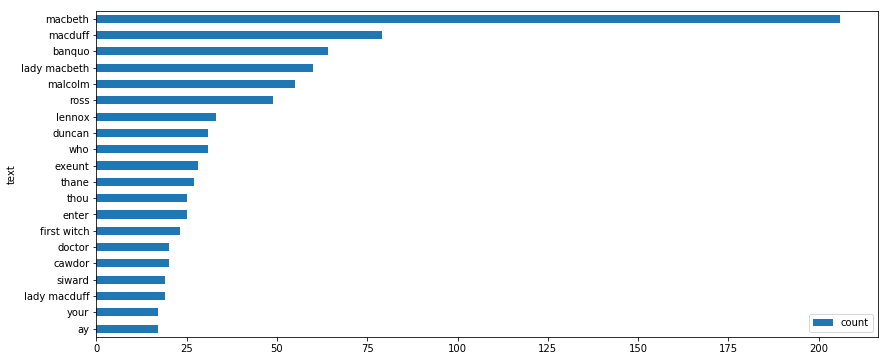

In [9]:
plot_text_counts(macbeth_counts)

Surprise, surprise. *Macbeth* is the top phrase in Macbeth. Our main character is mentioned more than twice the number of times as the next most frequent phrase, *Macduff*, and more than three times the frequency that *Lady Macbeth* is mentioned.

## Thinking about the results

One of the first things we might realize from this simple investigation is the importance of proper nouns. Phrases containing the main characters occur far more frequently than other phrases, and the main character of the play is mentioned far more times than any other characters.

Are these observations particular to Macbeth? Or to Shakespeare's plays? Or are they more universal?

Now that we've gone through Macbeth, how hard could it be to look at a few others?

**Hamlet** can be found on [gutenberg.org](http://www.gutenberg.org) under **EBook-No.** *1524*, and we already know from the above how to plot that out. In fact, there were really only 4 important lines.

## Looking at Hamlet

Run the following block to download **Hamlet**, pull out all the noun phrases, count them up, and plot them out.

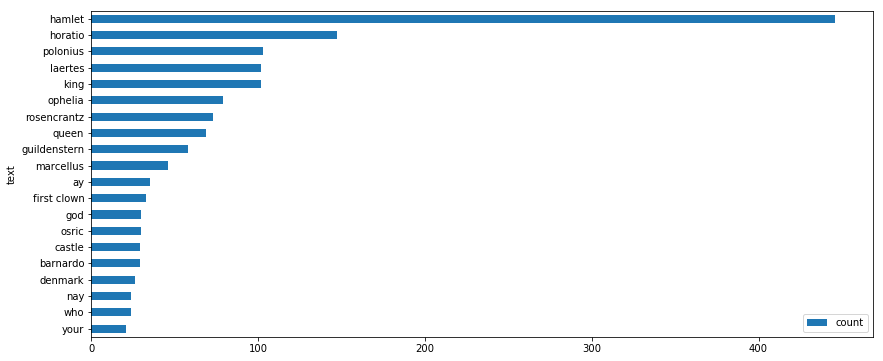

In [10]:
hamlet = get_gutenberg_text(1524)
hamlet_phrases = noun_phrases(hamlet)
hamlet_counts = count_unique(hamlet_phrases)[0:20]
plot_text_counts(hamlet_counts)

## Comparing other texts

We could keep doing this for other texts. But if you think about it, we're really just doing the same steps over and over and over again. We're copying those same 4 lines and the only thing we really need to change about them is the **EBook-No.** we give to `get_gutenberg_text`.

What if you collected all of the **EBook-No.** numbers for texts you wanted to look at and put them in a list, with some labels to help you identify them? Here's how you can do that:

In [11]:
choices = { 'Shakespeare - Macbeth': 1129, 
            'Shakespeare - Hamlet': 1524,
            'Shakespeare - Romeo and Juliet': 1112,
            'Charles Dickens - A Christmas Carol': 19337 }

Now we'll make our recipe. This could be hidden and made into a helper like we've been using so far, but we want to show how you can fit together what you've learned.

In [12]:
def plot_gutenberg(ebook_no):
    text = get_gutenberg_text(ebook_no)
    phrases = noun_phrases(text)
    counts = count_unique(phrases)[0:20]
    plot_text_counts(counts)

Notice that the main difference is that you've wrapped these lines inside something called `plot_gutenberg` which accepts a value it stores in `ebook_no`. Then, instead of the actual **EBook-No.**, you pass `ebook_no` into `get_gutenberg_text`.

You could then use `plot_gutenberg` on any **EBook-No.**

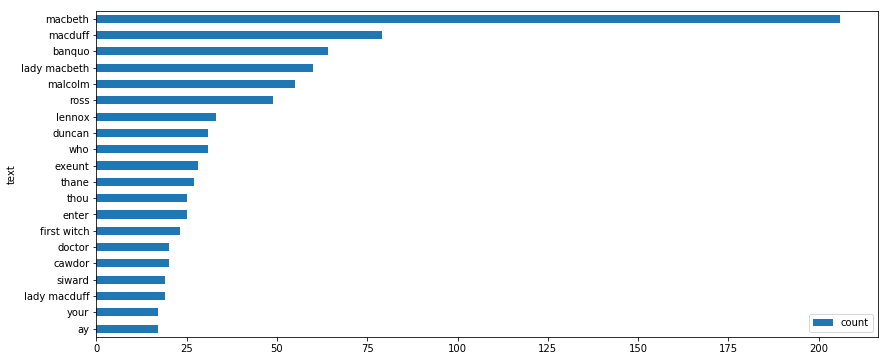

In [13]:
plot_gutenberg(1129)

Or, you could use the `choices` list that we defined above to do the same thing in a more readable way. Now we're not just plotting out **EBook-No.** *1129*. We're plotting out Shakespeare's *Macbeth*!

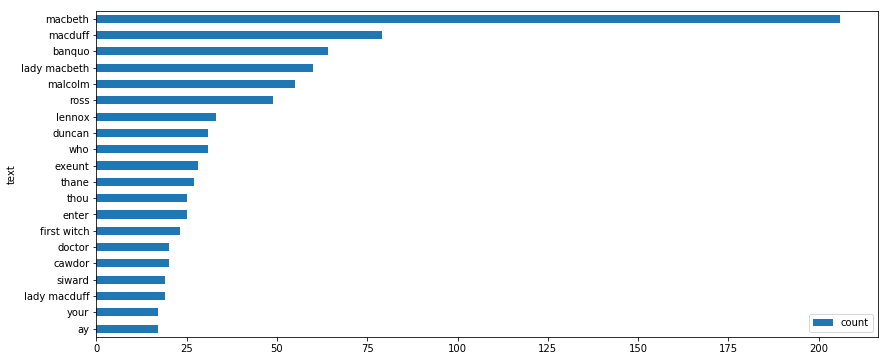

In [14]:
plot_gutenberg(choices['Shakespeare - Macbeth'])

Let's do one last thing. Why keep typing and running even one line when you can make it interactive!

But before we do that, we need to deal with one little problem. We still have to wait a few seconds to see the results when we run `plot_gutenberg`, and if we're going to make it even easier to switch back and forth between different works, we don't want to have to always wait to see our plot.

There are many ways to tackle this, but one quick way is to do the work that takes the most time up front and store the results. Let's create a new recipe called `count_noun_phrases` that'll do everything that `plot_gutenberg` did, *except* draw the final plot. Then we'll store it. We'll use the same `ebook_no` that the folks at Gutenberg do so we can easily find it.

This might take a minute or two, so be patient! It's going to go through everything in `choices`, grab the text, find the noun phrases, and count them up, then store all that in `stored_counts`. That's a lot of work!

In [15]:
stored_counts = {}

def count_noun_phrases(ebook_no):
    text = get_gutenberg_text(ebook_no)
    phrases = noun_phrases(text)
    counts = count_unique(phrases)[0:20]
    return counts

for ebook_no in choices.values():
    stored_counts[ebook_no] = count_noun_phrases(ebook_no)

Now let's redefine what `plot_gutenberg` does. It no longer needs to crunch the data every time. It can just grab it from `stored_counts`.

In [16]:
def plot_gutenberg(ebook_no):
    plot_text_counts(stored_counts[ebook_no])

## Building our text selector

Time for the closing act! This is where things get a bit fancier. Don't worry if you don't fully understand what's going on in this next block. Right now, just see if you can spot some similar names, and note that with just a couple more lines, we're going to make it really easy to browse the top 20 phrases of any number of works from [gutenberg.org](http://www.gutenberg.org)!

In [17]:
selector = widgets.Dropdown(options=choices, description='Select Text:')
interact(plot_gutenberg, ebook_no=selector)

interactive(children=(Dropdown(description='Select Text:', options={'Shakespeare - Macbeth': 1129, 'Shakespeare - Hamlet': 1524, 'Shakespeare - Romeo and Juliet': 1112, 'Charles Dickens - A Christmas Carol': 19337}, value=1129), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_gutenberg(ebook_no)>

## And we're done!

Plus, we may have even gotten some new insights. For example, you'll see a play from Charles Dickens in the list of choices. Sure enough, we find Scrooge, the main character of *A Christmas Carol*, right at the top, followed by a few other main characters in the top 20. So it's not just Shakespeare who likes to mention his main character's name a lot. Perhaps it's more common.

If you've already read some of these, you may also find it interesting that the top 20 most frequent noun phrases also capture a lot of what's unique about that particular work.

## Experimenting

This is only scratching the surface. You could remove the proper nouns on purpose to observe how language and style might change between different writers during different times in history. With a few changes you could even run this on news articles or any other text you could get your hands on.

One really easy thing to do is simply add more choices to your selector. Feel free to try this out on your own selection of Gutenberg texts. Once you find the right **EBook-No.**, just add it to the list of `choices`. Remember, you'll have to rerun the step above that crunches the noun phrases and stores them as well before rerunning the last step that makes our selector. 

<img src="../../images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg"/>